In [1]:
import numpy as np
import tensorflow as tf

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

## Extracting the labels

This is for general use in every classification.

In [2]:
(_, y_train), (_, y_test) = mnist.load_data()

In [3]:
y_train = tf.keras.utils.to_categorical(
    y_train, dtype='float32'
)

In [4]:
y_test = tf.keras.utils.to_categorical(
    y_test, dtype='float32'
)

## NO-FIT ANN Features
Loading the features extractes from a ANN that ran without the usage of the fit function

In [5]:
simple_ann_train_features_nofit = np.loadtxt('simple_ann_train_features_nofit.out', dtype='float32', delimiter=' ')

In [6]:
simple_ann_test_features_nofit = np.loadtxt('simple_ann_test_features_nofit.out', dtype='float32', delimiter=' ')

In [7]:
simple_ann_train_features_nofit.shape

(60000, 512)

In [7]:
model = Sequential()

model.add(Dense(512, input_shape=(512,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

earlyStopping = EarlyStopping(monitor='val_loss',
                              patience=32)

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(simple_ann_train_features_nofit,
                    y_train,
                    epochs=250, 
                    batch_size=1000, 
                    verbose=0, 
                    validation_split=0.2, 
                    callbacks=[earlyStopping])

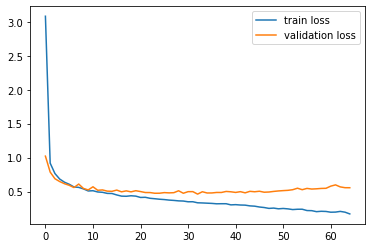

In [8]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

In [9]:
test_results = model.evaluate(simple_ann_test_features_nofit, y_test, verbose=1)

313/313 [==============================] - 1s 1ms/step - loss: 0.5464 - accuracy: 0.8614


In [10]:
predictions = model.predict(simple_ann_test_features_nofit)

In [11]:
l = []
for y, p in zip(y_test, predictions): 
    l.append(y - p)

(array([3.1700e+02, 1.6300e+02, 1.5700e+02, 1.1900e+02, 1.3100e+02,
        1.1700e+02, 1.3800e+02, 1.3000e+02, 1.7600e+02, 1.9700e+02,
        2.5600e+02, 2.8800e+02, 4.8600e+02, 9.4700e+02, 8.6378e+04,
        7.2800e+03, 4.2000e+02, 2.4000e+02, 1.5600e+02, 1.5100e+02,
        1.2600e+02, 1.1300e+02, 9.5000e+01, 8.3000e+01, 8.6000e+01,
        1.2500e+02, 1.0800e+02, 1.3800e+02, 1.9500e+02, 6.8400e+02]),
 array([-1.        , -0.93333334, -0.8666667 , -0.8       , -0.73333335,
        -0.6666667 , -0.6       , -0.53333336, -0.46666667, -0.4       ,
        -0.33333334, -0.26666668, -0.2       , -0.13333334, -0.06666667,
         0.        ,  0.06666667,  0.13333334,  0.2       ,  0.26666668,
         0.33333334,  0.4       ,  0.46666667,  0.53333336,  0.6       ,
         0.6666667 ,  0.73333335,  0.8       ,  0.8666667 ,  0.93333334,
         1.        ], dtype=float32),
 <BarContainer object of 30 artists>)

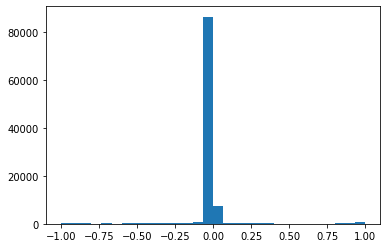

In [12]:
plt.hist(np.array(l).flatten(), bins=30)

## Trained ANN features